In [346]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

raw_data = requests.get("https://api.covid19api.com/countries")
json_data = raw_data.json()
df = pd.DataFrame.from_dict(json_data)
print(df[df['Country'] == 'Korea (South)'])

          Country         Slug ISO2
52  Korea (South)  korea-south   KR


In [340]:
# API report của country được followed by endpoint Slug
# https://api.covid19api.com/dayone/country/${Slug}

# Format lại date cho dễ nhìn
from datetime import datetime
def convertDate(d):
    date = datetime.strptime(d,"%Y-%m-%dT%H:%M:%SZ")
    new_format = "%Y-%m-%d"
    date.strftime(new_format)
    return date
    
def model_predict(country_slug):
    report = requests.get(f"https://api.covid19api.com/dayone/country/{country_slug}")
    json_data = report.json()
    df = pd.DataFrame.from_dict(json_data)
    
    # Lọc data cần thiết
    df = df[['Confirmed', 'Deaths', 'Recovered', 'Date']]
    df['Date'] = df['Date'].apply(convertDate)
    
    # convert the dates or timestamps to an integer number of days since the start of the data. (23-1-2020)
    df['Date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

    X = df['Date_delta']
    X = X.values.reshape(-1, 1)
    y = df[['Confirmed']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

    regr = LinearRegression()
    regr.fit(X_train, y_train)

    # x_range = np.array(pd.to_datetime(pd.date_range(start='11/6/2021', end='11/6/2022', freq='D')), dtype=float)
    x_range = np.linspace(X_train.min(), X_train.max(), 100)
    y_predict = regr.predict(X_train.reshape(-1, 1))

    plt.scatter(X_train, y_train, alpha=0.2)
    plt.plot(X_train, y_predict, 'red')
    plt.title(f'Mô hình linear regression {country_slug}')
    plt.ylabel('Số ca nhiễm')
    plt.xlabel('Số ngày (tính từ 23-01-2020)')


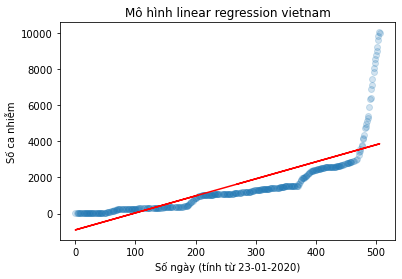

In [341]:
model_predict("vietnam")

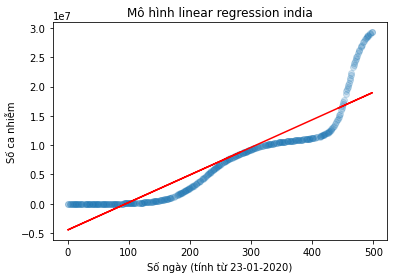

In [342]:
model_predict("india")

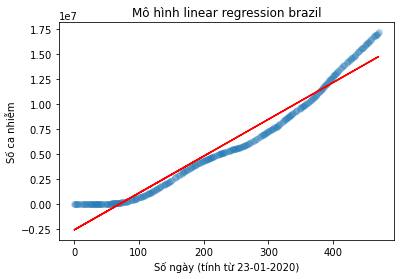

In [343]:
model_predict("brazil")

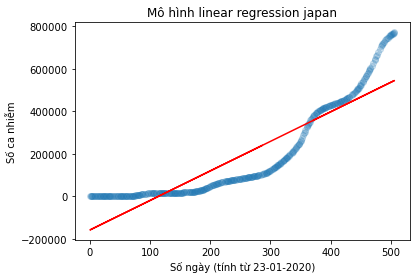

In [344]:
model_predict("japan")

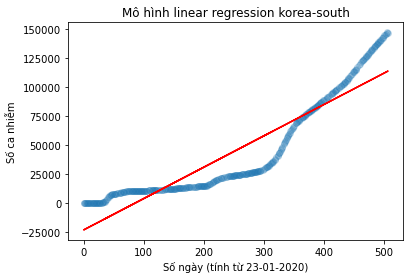

In [347]:
model_predict("korea-south")